In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
titanic=pd.read_csv("train.csv")


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


titanic.head()

# Survival count plot

Text(0.5, 1.0, 'Survival rate')

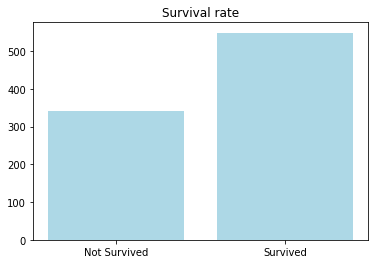

In [8]:
sur_rate1=titanic[titanic['Survived']==1] # Couht of who survived
sur_rate2=titanic[titanic['Survived']==0] # cout of who didnt survive
# plot survival data 0 and 1 on x axis and count of survival on y axis
data=[len(sur_rate1),len(sur_rate2)]
x_data=["Not Survived","Survived"]
plt.bar(x_data,data,color='lightblue')
plt.title("Survival rate")

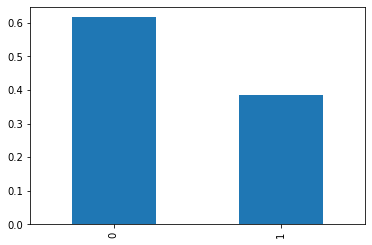

In [10]:
# using panda plot
#survival_rate.plot(kind="bar",title='Survival rate',alpha=0.5) # alpha is for opacity
survival_rate_norm=titanic['Survived'].value_counts(normalize=True)

survival_rate_norm.plot(kind="bar")

# Survival rate with respect to class

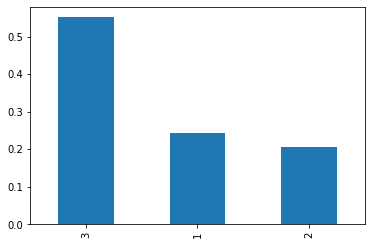

In [11]:
clasess=titanic['Pclass'].value_counts()  # gives in count
classes_norm=titanic['Pclass'].value_counts(normalize=True) # normalise value
classes_norm
y_classes=["1","2","3"]
#plt.bar(y_classes,classes_norm)
classes_norm.plot(kind='bar')

In [12]:
import scipy

# Age distribution across class

Text(0.5, 1.0, 'class with regard to age')

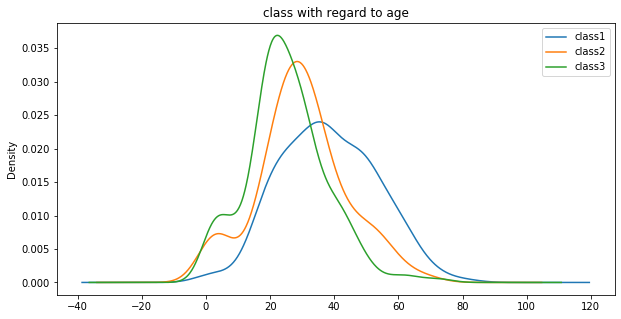

In [13]:
for i in [1,2,3]:
    titanic[titanic['Pclass']==i]['Age'].plot(kind="kde",figsize=(10,5))
plt.legend(["class1","class2","class3"])
plt.title("class with regard to age")

# chart observation
#negative values on x axis because some rows dont have age value
#blue line= class 1, age group 20 to 60 belong to class 1
#orange line =class 2 age group 20 to 40
#green line= class 3 age group 10 to 30

# comparison of survived men against survived women

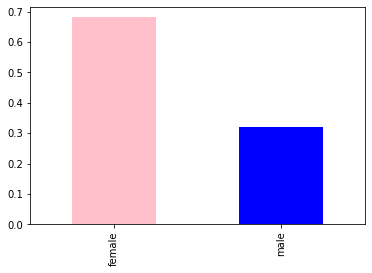

In [14]:
gender_survived=titanic[titanic['Survived']==1]['Sex'].value_counts(normalize=True)
gender_survived.plot(kind='bar',color=["pink","b"])

# chart of survived people as per location of embark.

Text(0, 0.5, 'Survived count')

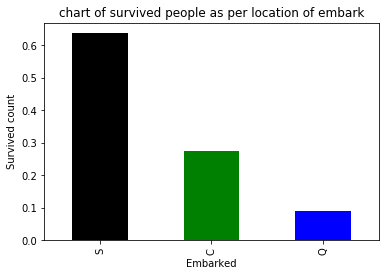

In [15]:
 
embark_survived=titanic[titanic['Survived']==1]['Embarked'].value_counts(normalize=True)
embark_survived.plot(kind='bar',color=['k','green','blue']) # k is for black color
plt.title("chart of survived people as per location of embark")
plt.xlabel("Embarked")
plt.ylabel('Survived count')

# Analysis- 
People who embarked at S survived more than people who embarked at C or Q
People who embarked at Q survived the least

# Function for graphs

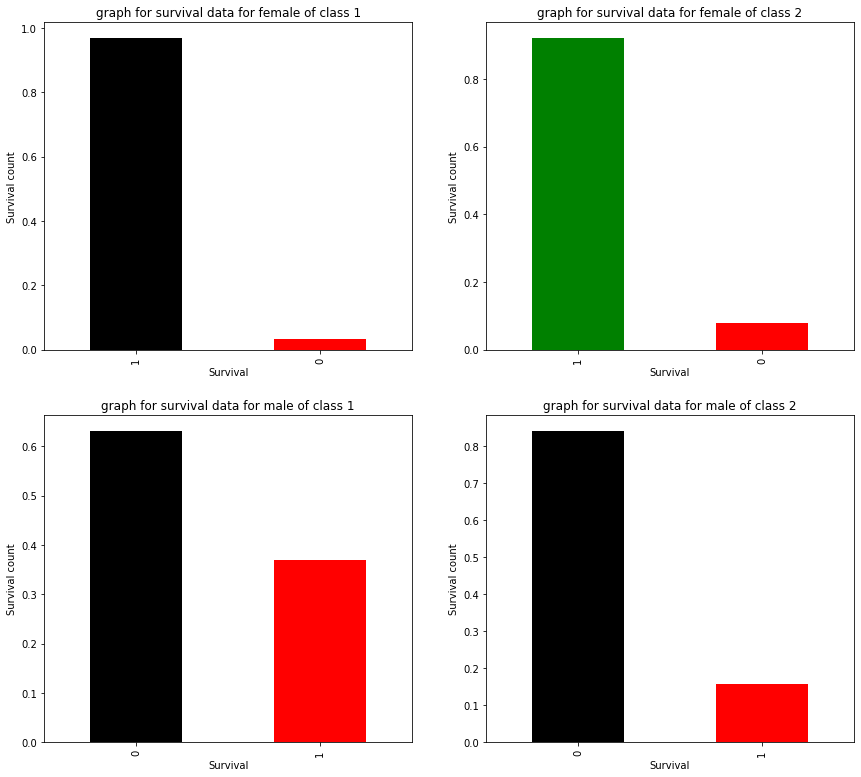

In [16]:
def gender_data(gender,class_num):
    gendersurvivaldata=titanic["Survived"][(titanic['Sex']==gender) & (titanic['Pclass']==class_num)].value_counts(normalize=True)
   
    return(gendersurvivaldata)


dataplot1=gender_data('female',1) # graph for survival data for female of class 1
subplot(2,2,1)
dataplot1.plot(kind='bar',color=['k','red'])
plt.ylabel("Survival count")
plt.xlabel("Survival")
plt.title("graph for survival data for female of class 1")
#plt.show()
dataplot2=gender_data('female',2) # graph for survival data for female of class 2
subplot(2,2,2)
dataplot2.plot(kind='bar',color=['green','red'])
plt.ylabel("Survival count")
plt.xlabel("Survival")
plt.title("graph for survival data for female of class 2")
#plt.show()
dataplot3=gender_data('male',1) # graph for survival data for male of class 1
subplot(2,2,3)
dataplot3.plot(kind='bar',color=['k','red'])
plt.ylabel("Survival count")
plt.xlabel("Survival")
plt.title("graph for survival data for male of class 1")
#plt.show()
dataplot4=gender_data('male',2) # graph for survival data for male of class 2
subplot(2,2,4)
dataplot4.plot(kind='bar',color=['k','red'])
plt.ylabel("Survival count")
plt.xlabel("Survival")
plt.title("graph for survival data for male of class 2")

plt.subplots_adjust(bottom=-1.5, right=2, top=1) # for spacing between subplots

plt.show()

# Function to plot Survival data as per chosen feature

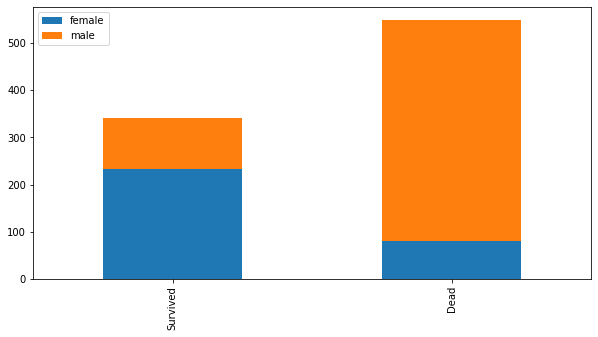

In [17]:
def plot_bar_chart(feature):
    survived_number=titanic[titanic['Survived']==1][feature].value_counts()
    not_survived_number=titanic[titanic['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived_number,not_survived_number])
    df.index=['Survived','Dead']
    #df.plot(kind='bar',figsize=(10,5)) # displays side by side
    df.plot(kind='bar',figsize=(10,5),stacked=True) # displays one above the other
plot_bar_chart("Sex")



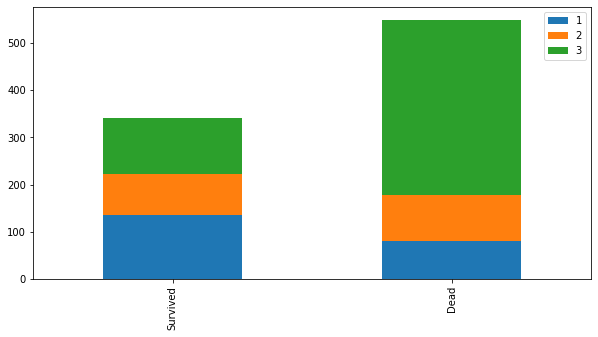

In [18]:
plot_bar_chart("Pclass")

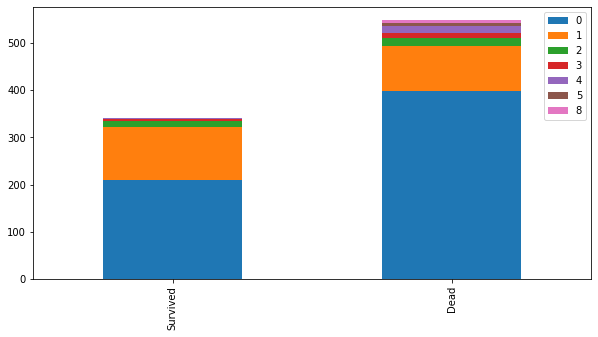

In [20]:
plot_bar_chart("SibSp")

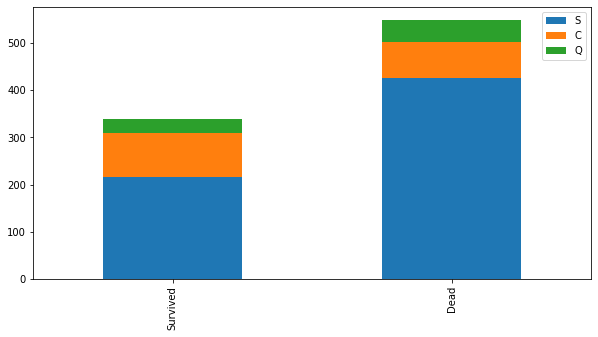

In [21]:
plot_bar_chart("Embarked")